# Import Libraries

In [ ]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math as m
import numpy as np
import pandas as pd
import os
import networkx as nx
import collections
from statistics import mean, stdev
import itertools

from collections import defaultdict
import operator

## For Hierarchical Clustering
from scipy.cluster import hierarchy
from scipy.spatial import distance

## For Community Detection (Louvain Method)
import community

# Load data and create network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
characters_path = '/content/drive/MyDrive/1USyd/3rd_sem/COMP5313/assessments/Assignment2/harishkgarg-harry-potter-universe/characters.csv'
df_characters = pd.read_csv(characters_path)
print(df_characters.columns)
print(df_characters.shape)

Index(['id', 'name', 'bio'], dtype='object')
(65, 3)


In [ ]:
df_characters.head()

,id,name,bio
0,0,Regulus Arcturus Black,Brother of Sirius. Used to be a Death Eater bu...
1,1,Sirius Black,Best friend of James Potter and godfather of H...
2,2,Lavender Brown,Killed by a werewolf. She was a gryffindor stu...
3,3,Cho Chang,Ravenclaw student who dated Cedric Diggory and...
4,4,Vincent Crabbe Sr.,Father of Crabbe and death-eater who escaped A...


In [ ]:
name_mapping ={}
for row in df_characters.itertuples():
  index = row[1]
  name = row[2]
  name_mapping[index] = name

In [ ]:
name_mapping

{0: 'Regulus Arcturus Black',
 1: 'Sirius Black',
 2: 'Lavender Brown',
 3: 'Cho Chang',
 4: 'Vincent Crabbe Sr.',
 5: 'Vincent Crabbe',
 6: 'Bartemius "Barty" Crouch Sr.',
 7: 'Bartemius "Barty" Crouch Jr.',
 8: 'Fleur Delacour',
 9: 'Cedric Diggory',
 10: 'Alberforth Dumbledore',
 11: 'Albus Dumbledore',
 12: 'Dudley Dursley',
 13: 'Petunia Dursley',
 14: 'Vernon Dursley',
 15: 'Argus Filch',
 16: 'Seamus Finnigan',
 17: 'Nicolas Flamel',
 18: 'Cornelius Fudge',
 19: 'Goyle Sr.',
 20: 'Gregory Goyle',
 21: 'Hermione Granger',
 22: 'Rubeus Hagrid',
 23: 'Igor Karkaroff',
 24: 'Viktor Krum',
 25: 'Bellatrix Lestrange',
 26: 'Alice Longbottom',
 27: 'Frank Longbottom',
 28: 'Neville Longbottom',
 29: 'Luna Lovegood',
 30: 'Xenophilius Lovegood',
 31: 'Remus Lupin',
 32: 'Draco Malfoy',
 33: 'Lucius Malfoy',
 34: 'Narcissa Malfoy',
 35: 'Olympe Maxime',
 36: 'Minerva McGonagall',
 37: 'Alastor "Mad-Eye" Moody',
 38: 'Peter Pettigrew',
 39: 'Harry Potter',
 40: 'James Potter',
 41: 'Lily 

In [ ]:
relations_path = '/content/drive/MyDrive/1USyd/3rd_sem/COMP5313/assessments/Assignment2/harishkgarg-harry-potter-universe/relations.csv'
df_relations = pd.read_csv(relations_path)
print(df_relations.columns)
print(df_relations.shape)
df_relations.head()

Index(['source', 'target', 'type'], dtype='object')
(513, 3)


,source,target,type
0,0,1,-
1,0,25,-
2,0,45,-
3,1,0,-
4,1,11,+


In [ ]:
df_relations['sign'] = df_relations['type'].apply(lambda x: 1 if x == '+' else -1)

In [ ]:
df_relations.head()

,source,target,type,sign
0,0,1,-,-1
1,0,25,-,-1
2,0,45,-,-1
3,1,0,-,-1
4,1,11,+,1


In [ ]:
G0 = nx.DiGraph()
for row in df_relations.itertuples():
  source = row[1]
  target = row[2]
  sign_ = row[4]
  G0.add_edge(source, target, sign = sign_)

## Descriptive network measures

In [ ]:
nx.is_strongly_connected(G0)

False

In [ ]:
nx.is_weakly_connected(G0)

True

In [ ]:
largest = max(nx.strongly_connected_components(G0), key=len)

In [ ]:
len(largest)

59

In [ ]:
weak_lcc = max(nx.weakly_connected_components(G0), key=len)

In [ ]:
len(weak_lcc)

65

In [ ]:
list(G0.edges())[:3]

[(0, 1), (0, 25), (0, 45)]

In [ ]:
G0[0][1]['sign']

-1

In [ ]:
G0.number_of_nodes()

65

In [ ]:
G0.number_of_edges()

456

In [ ]:
nx.transitivity(G0)

0.3825301204819277

In [ ]:
def z_measures(G):
    '''Function to calc <z> and sigma_z'''
    N = G.number_of_nodes()
    zij= dict(nx.degree(G))
    zi = np.array([zij[k] for k in zij])
    average_z = np.sum(zi)/N
    av_zsquared = np.sum(np.square(zi))/N
    sd_z = np.sqrt(av_zsquared - np.square(average_z))

    return average_z, sd_z

In [ ]:
z_measures(G0)

(14.03076923076923, 12.608872615704122)

In [ ]:
nx.density(G0)

0.10961538461538461

In [ ]:
nx.shortest_paths.average_shortest_path_length(G0)

2.375

In [ ]:
nx.average_clustering(G0)

0.41509401336828167

In [ ]:
cij = dict(nx.clustering(G0))
ci = [cij[k] for k in cij]
average_ci = (np.sum(ci)/G0.number_of_nodes())

In [ ]:
average_ci

0.4150940133682817

In [ ]:
nx.number_strongly_connected_components(G0)

6

In [ ]:
list(nx.strongly_connected_components(G0))

In [ ]:
nx.number_weakly_connected_components(G0)

1

In [ ]:
list(nx.weakly_connected_components(G0))

## draw function

In [ ]:
edges = list(G0.edges())
colors = []
for u,v in edges:
  if G0[u][v]['sign'] == 1:
    colors.append('g')
  else:
    colors.append('r')

In [ ]:
from itertools import count
def draw_network(G, with_labels = True, graph_layout = 'shell'):
    '''Draw the graph with node's color varies with its degree'''
    # get unique groups
    groups = set([G.degree()[node] for node in list(G.nodes())])
    mapping = dict(zip(sorted(groups),count()))
    nodecolors = [mapping[G.degree()[node]] for node in list(G.nodes())]
    nodedegree = dict(G.degree)

    # drawing nodes and edges separately so we can capture collection for colobar
    plt.figure(figsize=(10, 10))

    if graph_layout == 'spring':
      pos = nx.spring_layout(G)
    elif graph_layout == 'spectral':
      pos = nx.spectral_layout(G)
    elif graph_layout == 'random':
      pos = nx.random_layout(G)
    else:
      pos = nx.shell_layout(G)

    edges = list(G.edges())
    colors = []
    for u,v in edges:
      if G[u][v]['sign'] == 1:
        colors.append('g')
      else:
        colors.append('r')

    node_size = 100
    # node_size = [v * 100 for v in nodedegree.values()]
    ec = nx.draw_networkx_edges(G, pos, edge_color = colors, alpha=0.5)
    nc = nx.draw_networkx_nodes(G, pos, nodelist = G.nodes(), node_color = nodecolors,\
        node_size =node_size, cmap=plt.cm.RdPu_r)

    if with_labels == True:
        labels = nx.draw_networkx_labels(G,pos)

    # plt.colorbar(nc)
    plt.axis('off')
    plt.show()

In [ ]:
G_hp = nx.relabel_nodes(G0, name_mapping)

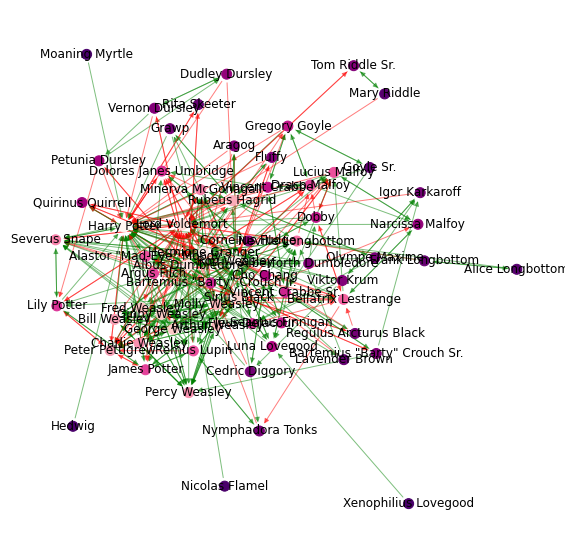

In [ ]:
draw_network(G_hp, graph_layout='spring')

# Structural balance

## Digraph

In [ ]:
G0.number_of_edges()

456

### triads

In [ ]:
nx.triadic_census(G0)

{'003': 28021,
 '012': 6749,
 '021C': 288,
 '021D': 237,
 '021U': 1107,
 '030C': 5,
 '030T': 211,
 '102': 4599,
 '111D': 942,
 '111U': 584,
 '120C': 36,
 '120D': 131,
 '120U': 167,
 '201': 333,
 '210': 186,
 '300': 84}

In [ ]:
# https://stackoverflow.com/questions/55339231/get-the-list-of-triad-nodes-who-fall-under-the-category-of-individual-triadic/55375317#55375317
def _tricode(G, v, u, w):
    """Returns the integer code of the given triad.

    This is some fancy magic that comes from Batagelj and Mrvar's paper. It
    treats each edge joining a pair of `v`, `u`, and `w` as a bit in
    the binary representation of an integer.

    """
    combos = ((v, u, 1), (u, v, 2), (v, w, 4), (w, v, 8), (u, w, 16),
              (w, u, 32))
    return sum(x for u, v, x in combos if v in G[u])

In [ ]:
def triads_dict(G):
  TRICODES = (1, 2, 2, 3, 2, 4, 6, 8, 2, 6, 5, 7, 3, 8, 7, 11, 2, 6, 4, 8, 5, 9,
              9, 13, 6, 10, 9, 14, 7, 14, 12, 15, 2, 5, 6, 7, 6, 9, 10, 14, 4, 9,
              9, 12, 8, 13, 14, 15, 3, 7, 8, 11, 7, 12, 14, 15, 8, 14, 13, 15,
              11, 15, 15, 16)

  TRIAD_NAMES = ('003', '012', '102', '021D', '021U', '021C', '111D', '111U',
                '030T', '030C', '201', '120D', '120U', '120C', '210', '300')

  TRICODE_TO_NAME = {i: TRIAD_NAMES[code - 1] for i, code in enumerate(TRICODES)}

  triad_nodes = {name: set([]) for name in TRIAD_NAMES}
  m = {v: i for i, v in enumerate(G)}
  for v in G:
      vnbrs = set(G.pred[v]) | set(G.succ[v])
      for u in vnbrs:
          if m[u] > m[v]:
              unbrs = set(G.pred[u]) | set(G.succ[u])
              neighbors = (vnbrs | unbrs) - {u, v}
              not_neighbors = set(G.nodes()) - neighbors - {u, v}
              # Find dyadic triads
              for w in not_neighbors:
                  if v in G[u] and u in G[v]:
                      triad_nodes['102'].add(tuple(sorted([u, v, w])))
                  else:
                      triad_nodes['012'].add(tuple(sorted([u, v, w])))
              for w in neighbors:
                  if m[u] < m[w] or (m[v] < m[w] < m[u] and
                                    v not in G.pred[w] and
                                    v not in G.succ[w]):
                      code = _tricode(G, v, u, w)
                      triad_nodes[TRICODE_TO_NAME[code]].add(
                          tuple(sorted([u, v, w])))

  # find null triads
  all_tuples = set()
  for s in triad_nodes.values():
      all_tuples = all_tuples.union(s)
  triad_nodes['003'] = set(itertools.combinations(G.nodes(), 3)).difference(all_tuples)

  return triad_nodes

In [ ]:
triads_hp = triads_dict(G0)

In [ ]:
four_triads = {}
interested_triads = ['030T','120D','120U','300']
for (triad,ls) in triads_hp.items():
  if triad in interested_triads:
    four_triads[triad] = ls

In [ ]:
len(four_triads['300'])

84

In [ ]:
list(four_triads['300'])[0]

(53, 54, 57)

In [ ]:
list(list(four_triads['300'])[0])

[53, 54, 57]

In [ ]:
list(list(four_triads['120D'])[0])

[11, 53, 57]

In [ ]:
H = G0.subgraph(list(list(four_triads['120D'])[0]))
sorted(list(H.edges()))

[(11, 53), (11, 57), (53, 57), (57, 53)]

In [ ]:
u,v = sorted(list(H.edges()))[0]

### 030T

In [ ]:
def semicycles_statistic(semicycle_signs):
  # '+ + +'
  all_positive = 0
  # '+ + -'
  one_negative = 0
  # '+ - -'
  one_positive = 0
  # '- - -'
  all_negative = 0

  neg_count = semicycle_signs.count(-1)
  if (neg_count%2)==0:
    # Even number of -ve means positive
    if neg_count == 0:
      all_positive += 1
    else:
      one_positive += 1
  else:
    # Odd number of -ve means negative
    if neg_count == 1:
      one_negative += 1
    else:
      all_negative += 1

  return all_positive, one_negative, one_positive, all_negative

In [ ]:
four_triads['030T']

In [ ]:
def triad_balance_count1(semicycles_sign):
  '''For triad type 030T and undirected closed triads only'''
  complete_balance = semicycles_sign.count(1)
  partial_balance = 0
  imbalanced = semicycles_sign.count(-1)
  balance_ratio = (complete_balance / len(semicycles_sign))*100
  return complete_balance, partial_balance, imbalanced, round(balance_ratio,2)

In [ ]:
def draw_triads(subgraph):
  interested_nodes = [11,21,39,45,58]
  triad_nodes = list(subgraph.nodes())
  for i in triad_nodes:
    if i in interested_nodes:
      subgraph = nx.relabel_nodes(subgraph, name_mapping)
      d = draw_network(subgraph)
      return d

In [ ]:
all_positive1 = 0
one_negative1 = 0
one_positive1 = 0
all_negative1 = 0

semicycles_sign1 = []

for triad in list(four_triads['030T']):
  nodes = list(triad)
  H = G0.subgraph(nodes)

  # draw_triads(H)

  sign_list1=[]
  for u,v,data in H.edges(data=True):
    sign_list1.append(data['sign'])

  neg_count1 = sign_list1.count(-1)
  if (neg_count1%2)==0:
    # Even number of -ve means positive
    # draw_triads(H)
    semicycles_sign1.append(1)
  else:
    # Odd number of -ve means negative
    draw_triads(H)
    semicycles_sign1.append(-1)

  all_pos1, one_neg1, one_pos1, all_neg1 = semicycles_statistic(sign_list1)
  all_positive1 += all_pos1
  one_negative1 += one_neg1
  one_positive1 += one_pos1
  all_negative1 += all_neg1


complete_balance1, partial_balance1, imbalanced1, balance_ratio1 = triad_balance_count1(semicycles_sign1)


In [ ]:
0%2

0

In [ ]:
(complete_balance1 + partial_balance1 + imbalanced1) == len(list(four_triads['030T']))

True

### 120D

In [ ]:
def triad_balance_count(semicycles_sign):
  '''For triad types 120D 120U 300'''
  complete_balance = 0
  partial_balance = 0
  imbalanced = 0

  positive_semicycles = semicycles_sign.count(1)
  negative_semicycles = semicycles_sign.count(-1)

  if positive_semicycles == len(semicycles_sign):
    complete_balance += 1
  elif negative_semicycles == len(semicycles_sign):
    imbalanced += 1
  else:
    partial_balance += 1

  # balanced ratio
  b_triad = positive_semicycles / len(semicycles_sign)


  return complete_balance, partial_balance, imbalanced, b_triad

In [ ]:
def balance_ratio(b_triad_all):
  total_triads = len(b_triad_all)
  negative_triads = b_triad_all.count(0)
  positive_triads = total_triads - negative_triads
  balance_ratio = (positive_triads / total_triads)*100
  return round(balance_ratio, 2)

In [ ]:
complete_balance2 = 0
partial_balance2 = 0
imbalanced2 = 0
B_triad2 = []

all_positive2 = 0
one_negative2 = 0
one_positive2 = 0
all_negative2 = 0

for triad in list(four_triads['120D']):
  nodes = list(triad)
  H = G0.subgraph(nodes)
  node = sorted(H.degree, key=lambda x: x[1], reverse=False)
  # let first node with degree 2 = X (as in paper)
  X,X_degree = node[0]
  # remaining nodes = P or O (as in paper)
  P,P_degree = node[1]
  O,O_degree = node[2]

  semicycle_list = [[(X,P),(P,O),(X,O)],\
                    [(X,O),(O,P),(X,P)]]

  semicycles_sign2 = []
  for semicycle in semicycle_list:
    sign_list2=[]
    for edge in semicycle:
      u, v = edge
      sign_list2.append(H[u][v]['sign'])

    neg_count2 = sign_list2.count(-1)
    if (neg_count2%2)==0:
      semicycles_sign2.append(1)
    else:
      draw_triads(H)
      semicycles_sign2.append(-1)

    all_pos2, one_neg2, one_pos2, all_neg2 = semicycles_statistic(sign_list2)
    all_positive2 += all_pos2
    one_negative2 += one_neg2
    one_positive2 += one_pos2
    all_negative2 += all_neg2

  complete_balance, partial_balance, imbalanced , b_triad = triad_balance_count(semicycles_sign2)
  complete_balance2 += complete_balance
  partial_balance2 += partial_balance
  imbalanced2 += imbalanced
  B_triad2.append(b_triad)

balance_ratio2 = balance_ratio(B_triad2)

In [ ]:
(complete_balance2 + partial_balance2 + imbalanced2) == len(list(four_triads['120D']))

True

### 120U

In [ ]:
complete_balance3 = 0
partial_balance3 = 0
imbalanced3 = 0
B_triad3 = []

all_positive3 = 0
one_negative3 = 0
one_positive3 = 0
all_negative3 = 0

for triad in list(four_triads['120U']):
  nodes = list(triad)
  H = G0.subgraph(nodes)
  node = sorted(H.degree, key=lambda x: x[1], reverse=False)
  # let first node with degree 2 = X (as in paper)
  X,X_degree = node[0]
  # remaining nodes = P or O (as in paper)
  P,P_degree = node[1]
  O,O_degree = node[2]

  semicycle_list = [[(P,O),(O,X),(P,X)],\
                    [(O,P),(P,X),(O,X)]]

  semicycles_sign3 = []
  for semicycle in semicycle_list:
    sign_list3=[]
    for edge in semicycle:
      u, v = edge
      sign_list3.append(H[u][v]['sign'])

    neg_count3 = sign_list3.count(-1)
    if (neg_count3%2)==0:
      semicycles_sign3.append(1)
    else:
      semicycles_sign3.append(-1)
      draw_triads(H)

    all_pos3, one_neg3, one_pos3, all_neg3 = semicycles_statistic(sign_list3)
    all_positive3 += all_pos3
    one_negative3 += one_neg3
    one_positive3 += one_pos3
    all_negative3 += all_neg3

  complete_balance, partial_balance, imbalanced, b_triad = triad_balance_count(semicycles_sign3)
  complete_balance3 += complete_balance
  partial_balance3 += partial_balance
  imbalanced3 += imbalanced
  B_triad3.append(b_triad)

balance_ratio3 = balance_ratio(B_triad3)

In [ ]:
(complete_balance3 + partial_balance3 + imbalanced3) == len(list(four_triads['120U']))

True

### 300

In [ ]:
H = G0.subgraph(list(list(four_triads['300'])[0]))
u,v = sorted(list(H.edges()))[0]

In [ ]:
H[u][v]['sign']

1

In [ ]:
complete_balance4 = 0
partial_balance4 = 0
imbalanced4 = 0
B_triad4 = []

all_positive4 = 0
one_negative4 = 0
one_positive4 = 0
all_negative4 = 0

for triad in list(four_triads['300']):
  nodes = list(triad)
  H = G0.subgraph(nodes)

  # since all nodes have same degree
  # it doesnt matter which node is X,P,O
  X = nodes[0]
  P = nodes[1]
  O = nodes[2]

  # semicycles as shown in paper
  semicycle_list = [[(X,P),(P,O),(X,O)],\
                    [(X,O),(O,P),(X,P)],\
                    [(P,O),(O,X),(P,X)],\
                    [(O,P),(P,X),(O,X)],\
                    [(P,X),(X,O),(P,O)],\
                    [(O,X),(X,P),(O,P)]
                    ]

  semicycles_sign4 = []
  for semicycle in semicycle_list:
    sign_list4=[]
    for edge in semicycle:
      u, v = edge
      sign_list4.append(H[u][v]['sign'])

    neg_count4 = sign_list4.count(-1)
    if (neg_count4%2)==0:
      semicycles_sign4.append(1)
    else:
      semicycles_sign4.append(-1)
      draw_triads(H)

    all_pos4, one_neg4, one_pos4, all_neg4 = semicycles_statistic(sign_list4)
    all_positive4 += all_pos4
    one_negative4 += one_neg4
    one_positive4 += one_pos4
    all_negative4 += all_neg4

  complete_balance, partial_balance, imbalanced, b_triad = triad_balance_count(semicycles_sign4)
  complete_balance4 += complete_balance
  partial_balance4 += partial_balance
  imbalanced4 += imbalanced
  B_triad4.append(b_triad)

balance_ratio4 = balance_ratio(B_triad4)

In [ ]:
(complete_balance4 + partial_balance4 + imbalanced4) == len(list(four_triads['300']))

True

### Summary

In [ ]:
# For summary table use
count_triads = []
for i in interested_triads:
  triad_quantity = len(list(four_triads[i]))
  count_triads.append(triad_quantity)

count_sum = [sum(count_triads)]
count_result = count_triads + count_sum

compb = [complete_balance1, complete_balance2, complete_balance3, complete_balance4]
cb_sum = [sum(compb)]
compb_result = compb + cb_sum

partb = [partial_balance1, partial_balance2, partial_balance3, partial_balance4]
pb_sum = [sum(partb)]
partb_result = partb + pb_sum

imb = [imbalanced1, imbalanced2, imbalanced3, imbalanced4]
imb_sum = [sum(imb)]
imb_result = imb + imb_sum

b_ratio = [balance_ratio1, balance_ratio2, balance_ratio3, balance_ratio4]
br_avg = [round(sum(b_ratio)/len(b_ratio),2)]
br_result = b_ratio + br_avg

In [ ]:
!pip install texttable

In [ ]:
from texttable import Texttable
t = Texttable()
row_header = ['030T','120D','120U','300','Total']
x = [[]]
# t.add_rows([['Transitive triads type', 'Count','Completely Balanced',\
#              'Partially Balanced','Completely Imbalanced', 'Balance Ratio, B_T(%)']])
for i in range(len(row_header)):
  if i == range(len(row_header))[-1]:
    x.append([row_header[i], str(count_result[i]), str(compb_result[i]),\
               str(partb_result[i]), str(imb_result[i]), 'B_Avg(G)= '+str(br_result[i])
    ])
  else:
    x.append([row_header[i], str(count_result[i]), str(compb_result[i]),\
               str(partb_result[i]), str(imb_result[i]), str(br_result[i])
    ])

t.add_rows(x)
t.set_cols_align(['c']+['r']* (len(x)-1))
t.header(['Transitive triads type', 'Count','Completely Balanced',\
             'Partially Balanced','Completely Imbalanced', \
            'Balance Ratio, B_T(%)'])
print(t.draw())

+--------------+-------+-------------+-------------+-------------+-------------+
|  Transitive  | Count | Completely  |  Partially  | Completely  |   Balance   |
| triads type  |       |  Balanced   |  Balanced   | Imbalanced  |   Ratio,    |
|              |       |             |             |             |   B_T(%)    |
+==============+=======+=============+=============+=============+=============+
|     030T     |   211 |         190 |           0 |          21 |      90.050 |
+--------------+-------+-------------+-------------+-------------+-------------+
|     120D     |   131 |         115 |           0 |          16 |      87.790 |
+--------------+-------+-------------+-------------+-------------+-------------+
|     120U     |   167 |         158 |           2 |           7 |      95.810 |
+--------------+-------+-------------+-------------+-------------+-------------+
|     300      |    84 |          82 |           1 |           1 |      98.810 |
+--------------+-------+----

In [ ]:
# to record all four types of triads semicycles' statistics (counts)
# '+ + +'
all_positive = [all_positive1, all_positive2, all_positive3, all_positive4]
# '+ + -'
one_negative = [one_negative1, one_negative2, one_negative3, one_negative4]
# '+ - -'
one_positive = [one_positive1, one_positive2, one_positive3, one_positive4]
# '- - -'
all_negative = [all_negative1, all_negative2, all_negative3, all_negative4]

#
semicycle_stat = np.array([all_positive, one_negative,\
                          one_positive, all_negative])
semicycle_sum = np.sum(semicycle_stat,1)
semicycle_ratio = np.round(semicycle_sum/np.sum(semicycle_sum),2)

In [ ]:
print(semicycle_stat)

[[ 74 136 182 447]
 [ 17  24  14   9]
 [116  94 136  48]
 [  4   8   2   0]]


In [ ]:
count_result2 = list(semicycle_sum)+[np.sum(semicycle_sum)]
ratio_total2 = list(semicycle_ratio)+[np.sum(semicycle_ratio)]

In [ ]:
count_result2

[839, 64, 394, 14, 1311]

In [ ]:
ratio_total2

[0.64, 0.05, 0.3, 0.01, 1.0]

In [ ]:
t2 = Texttable()
row_header2 = ['+++','++-','+--','---','Total']
x2 = [[]]

for i in range(len(row_header2)):
  x2.append([row_header2[i], str(count_result2[i]), str(ratio_total2[i])])

t2.add_rows(x2)
t2.set_cols_align(['c','r','r'])
t2.header(['Semicycle type', 'Counts','Ratio-Total'])
print(t2.draw())

+----------------+--------+-------------+
| Semicycle type | Counts | Ratio-Total |
+================+========+=============+
|      +++       |    839 |       0.640 |
+----------------+--------+-------------+
|      ++-       |     64 |       0.050 |
+----------------+--------+-------------+
|      +--       |    394 |       0.300 |
+----------------+--------+-------------+
|      ---       |     14 |       0.010 |
+----------------+--------+-------------+
|     Total      |   1311 |           1 |
+----------------+--------+-------------+


## Undirected graph

In [ ]:
def have_bidirectional_relationship(G, node1, node2):
    return G.has_edge(node1, node2) and G.has_edge(node2, node1)

In [ ]:
def check_if_mutual(G):
  G0 = G.copy()
  edges = list(G0.edges())
  result = {}
  for u,v in edges:
    if have_bidirectional_relationship(G0, u, v):
      if G0[u][v]['sign'] != G0[v][u]['sign']:
        # different sign
        key1 = 'False'
        if key1 in result:
          result[key1].append((u,v))
        else:
          result[key1] = [(u,v)]
      else:
        # same sign
        key2 = 'True'
        if key2 in result:
          result[key2].append((u,v))
        else:
          result[key2] = [(u,v)]
    else:
      # not reciprocal
      key3 = 'Single'
      if key3 in result:
        result[key3].append((u,v))
      else:
        result[key3] = [(u,v)]

  return result

In [ ]:
check_mutual_dict = check_if_mutual(G0)
edge_to_remove = check_mutual_dict['False']
Gun = G0.copy()
Gun.remove_edges_from(edge_to_remove)
Gu = Gun.to_undirected(reciprocal= False) # keep those one-directional ties

In [ ]:
Gu.number_of_nodes()

65

In [ ]:
Gu.number_of_edges()

331

### for all closed triads

In [ ]:
from itertools import combinations
def closed_triads(G0):
  G = G0.copy()
  triad_list = []
  for nodes in combinations(G.nodes, 3):
    H = G.subgraph(nodes) # all triads
    n_edges = H.number_of_edges()
    if n_edges == 3: # only closed triads needed
      triad_list.append(nodes)
  return triad_list

In [ ]:
triad_list = closed_triads(Gu)

In [ ]:
len(triad_list)

1037

In [ ]:
triad_list[:5]

[(0, 1, 25), (0, 1, 45), (0, 25, 45), (0, 25, 4), (0, 45, 4)]

In [ ]:
countX = 0
for triad in triad_list:
  H = Gu.subgraph(triad)
  if H.number_of_edges() != 3:
    countX +=1

In [ ]:
countX

0

In [ ]:
all_positive0 = 0
one_negative0 = 0
one_positive0 = 0
all_negative0 = 0

semicycles_sign0 = []

for triad in triad_list:
  H = Gu.subgraph(triad)

  # draw_triads(H)

  sign_list0=[]
  for u,v,data in H.edges(data=True):
    sign_list0.append(data['sign'])

  neg_count0 = sign_list0.count(-1)
  if (neg_count0 % 2)==0:
    # Even number of -ve means positive
    # draw_triads(H)
    semicycles_sign0.append(1)
  else:
    # Odd number of -ve means negative
    draw_triads(H)
    semicycles_sign0.append(-1)

  all_pos0, one_neg0, one_pos0, all_neg0 = semicycles_statistic(sign_list0)
  all_positive0 += all_pos0
  one_negative0 += one_neg0
  one_positive0 += one_pos0
  all_negative0 += all_neg0


complete_balance0, partial_balance0, imbalanced0, balance_ratio0 \
= triad_balance_count1(semicycles_sign0)

### Summary

In [ ]:
t3 = Texttable()
row_header3 = 'flattened undirected network'
x3 = [[]]
x3.append([row_header3, str(len(triad_list)), str(complete_balance0),\
               str(partial_balance0), str(imbalanced0), str(balance_ratio0)
    ])

t3.add_rows(x3)
t3.set_cols_align(['c']*6)
t3.header([' ', 'Count','Completely Balanced',\
             'Partially Balanced','Completely Imbalanced', \
            'Balance Ratio, B_avg(G)(%)'])
print(t3.draw())

+--------------+-------+-------------+-------------+-------------+-------------+
|              | Count | Completely  |  Partially  | Completely  |   Balance   |
|              |       |  Balanced   |  Balanced   | Imbalanced  |   Ratio,    |
|              |       |             |             |             | B_avg(G)(%) |
+==============+=======+=============+=============+=============+=============+
|  flattened   | 1037  |     859     |      0      |     178     |   82.840    |
|  undirected  |       |             |             |             |             |
|   network    |       |             |             |             |             |
+--------------+-------+-------------+-------------+-------------+-------------+


In [ ]:
semicycle_stat1 = np.array([all_positive0, one_negative0,\
                          one_positive0, all_negative0])
semicycle_ratio1 = np.round(semicycle_stat1/np.sum(semicycle_stat1),3)
count_result4 = list(semicycle_stat1)+[np.sum(semicycle_stat1)]
ratio_total4 = list(semicycle_ratio1)+[np.sum(semicycle_ratio1)]

In [ ]:
t4 = Texttable()
row_header4 = ['+++','++-','+--','---','Total']
x4 = [[]]

for i in range(len(row_header4)):
  x4.append([row_header4[i], str(count_result4[i]), str(ratio_total4[i])])

t4.add_rows(x4)
t4.set_cols_align(['c','r','r'])
t4.header(['Triangle type', 'Counts','Ratio-Total'])
print(t4.draw())

+---------------+--------+-------------+
| Triangle type | Counts | Ratio-Total |
+===============+========+=============+
|      +++      |    499 |       0.481 |
+---------------+--------+-------------+
|      ++-      |    140 |       0.135 |
+---------------+--------+-------------+
|      +--      |    360 |       0.347 |
+---------------+--------+-------------+
|      ---      |     38 |       0.037 |
+---------------+--------+-------------+
|     Total     |   1037 |           1 |
+---------------+--------+-------------+


# Visualise network

In [ ]:
G0 = nx.relabel_nodes(G0, name_mapping)

In [ ]:
G = G0.to_undirected()

In [ ]:
partition = community.best_partition(G)

In [ ]:
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)

In [ ]:
cmap.name

'viridis'

In [ ]:
pos = nx.circular_layout(G)
pos.keys()

dict_keys(['Regulus Arcturus Black', 'Sirius Black', 'Bellatrix Lestrange', 'Lord Voldemort', 'Albus Dumbledore', 'Hermione Granger', 'Remus Lupin', 'Lucius Malfoy', 'Narcissa Malfoy', 'Minerva McGonagall', 'Alastor "Mad-Eye" Moody', 'Peter Pettigrew', 'Harry Potter', 'James Potter', 'Lily Potter', 'Severus Snape', 'Nymphadora Tonks', 'Arthur Weasley', 'Fred Weasley', 'George Weasley', 'Ginny Weasley', 'Ron Weasley', 'Lavender Brown', 'Neville Longbottom', 'Cho Chang', 'Cedric Diggory', 'Seamus Finnigan', 'Vincent Crabbe Sr.', 'Vincent Crabbe', 'Bartemius "Barty" Crouch Sr.', 'Dolores Janes Umbridge', 'Gregory Goyle', 'Draco Malfoy', 'Bartemius "Barty" Crouch Jr.', 'Igor Karkaroff', 'Percy Weasley', 'Fleur Delacour', 'Bill Weasley', 'Molly Weasley', 'Alberforth Dumbledore', 'Dobby', 'Petunia Dursley', 'Vernon Dursley', 'Rubeus Hagrid', 'Quirinus Quirrell', 'Rita Skeeter', 'Charlie Weasley', 'Dudley Dursley', 'Argus Filch', 'Luna Lovegood', 'Nicolas Flamel', 'Cornelius Fudge', 'Goyle Sr

In [ ]:
def visualise_louvain(G, with_labels = True, nodesize = 'fixed'):
  if G.is_directed():
    G = G.to_undirected()

  partition = community.best_partition(G)

  nodes_by_group = {}
  for i, v in partition.items():
    nodes_by_group[v] = [i] if v not in nodes_by_group.keys() else nodes_by_group[v] + [i]

  plt.figure(figsize=(20, 10))

  # color the nodes according to their partition
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
  # change the node size according to their degree
  nodedegree = dict(G.degree)

  ## layout (group nodes by partition)
  # modified from: https://stackoverflow.com/questions/55750436/group-nodes-together-in-networkx
  pos = nx.circular_layout(G)
  # prep center points (along circle perimeter) for the clusters
  angs = np.linspace(0, 2*np.pi, 1+len(nodes_by_group.keys()))
  repos = []
  rad = 3.0     # radius of circle
  for ea in angs:
    if ea > 0:
        #print(rad*np.cos(ea), rad*np.sin(ea))  # location of each cluster
        repos.append(np.array([rad*np.cos(ea), rad*np.sin(ea)]))
  for ea in pos.keys():
    posx = 0
    if ea in nodes_by_group[0]:
        posx = 0
    elif ea in nodes_by_group[1]:
        posx = 1
    elif ea in nodes_by_group[2]:
        posx = 2
    elif ea in nodes_by_group[3]:
        posx = 3
    elif ea in nodes_by_group[4]:
        posx = 4
    elif ea in nodes_by_group[5]:
        posx = 5
    else:
        pass
    #print(ea, pos[ea], pos[ea]+repos[posx], color, posx)
    pos[ea] += repos[posx]

  edges = list(G.edges())
  colors = []
  for u,v in edges:
    if G[u][v]['sign'] == 1:
      colors.append('g')
    else:
      colors.append('r')

  if nodesize == 'fixed':
    n_size = 100
  else:
    n_size = [v * 50 for v in nodedegree.values()]

  ec = nx.draw_networkx_edges(G, pos, edge_color = colors, alpha=0.5)
  nc = nx.draw_networkx_nodes(G, pos,\
                              nodelist = G.nodes(),\
                              node_color = list(partition.values()),\
                              node_size = n_size,\
                              cmap=cmap)

  if with_labels == True:
      labels = nx.draw_networkx_labels(G,pos)

  # plt.colorbar(nc)
  plt.axis('off')
  plt.show()


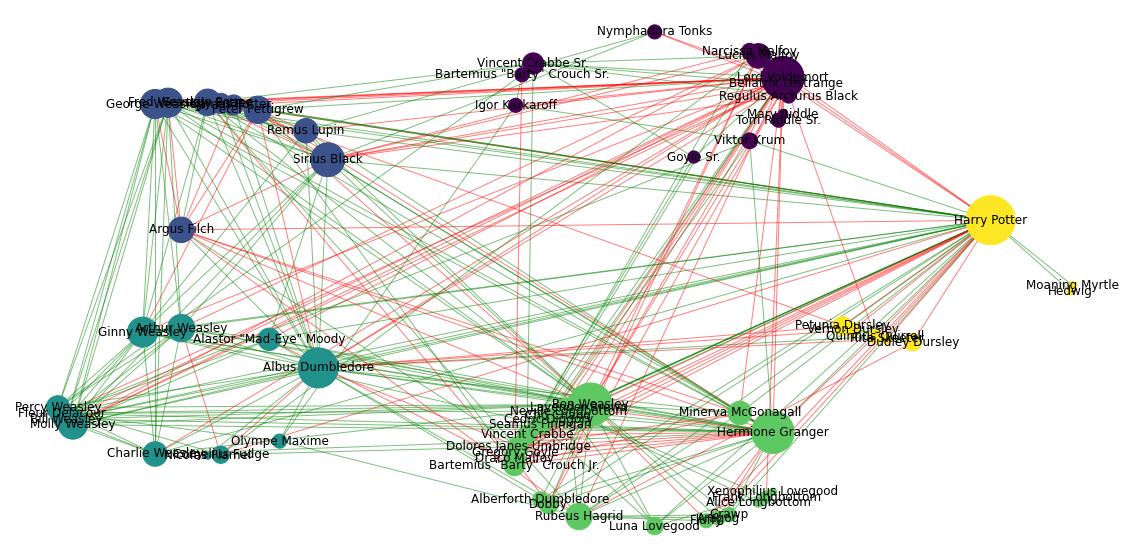

In [ ]:
visualise_louvain(G0, with_labels=True, nodesize = "")

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('COMP5048-Lab_7.ipynb')

--2022-09-13 11:52:07--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-09-13 11:52:09 (39.1 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] WARNING | pattern '$notebookpath$file_name' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
 

'File Download Unsuccessful. Saved in Google Drive'